# Introduction

In this notebook, I'll be demonstrating support vector machines (SVMs). 

If you haven't already, please refer to [01-data-exploration.ipynb](), as that notebook describes most of the data loading and pre-processing steps that we'll perform at the beginning of this notebook.

# Imports, Data Access / Loading, and Pre-processing

## Imports

In [ ]:
import os
import pandas as pd
import numpy as np

# We use two different plotting libraries, depending on which kind of plot we want
import matplotlib.pyplot as plt
import seaborn as sns

# Set an option for Pandas to display smaller floating-point numbers
pd.options.display.float_format = '{:,.2f}'.format

# SKLearn Imports
from sklearn import metrics

# Turn off warnings
import warnings
warnings.filterwarnings("ignore")

## Data Loading

In [ ]:
# Need to get Google Drive access
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Load the dataset into a Pandas dataframe
data_dir = os.path.join('/content/gdrive/My Drive/classes/be432-2021/notebooks/wisconsin_breast_cancer_data.csv')
df = pd.read_csv(data_dir)

df = df.set_index('id')

In [ ]:
df.head(20)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_label
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,"1,001.00",0.12,0.28,0.30,0.15,0.24,0.08,1.09,0.91,8.59,153.40,0.01,0.05,0.05,0.02,0.03,0.01,25.38,17.33,184.60,"2,019.00",0.16,0.67,0.71,0.27,0.46,0.12,1
842517,M,20.57,17.77,132.90,"1,326.00",0.08,0.08,0.09,0.07,0.18,0.06,0.54,0.73,3.40,74.08,0.01,0.01,0.02,0.01,0.01,0.00,24.99,23.41,158.80,"1,956.00",0.12,0.19,0.24,0.19,0.28,0.09,1
84300903,M,19.69,21.25,130.00,"1,203.00",0.11,0.16,0.20,0.13,0.21,0.06,0.75,0.79,4.58,94.03,0.01,0.04,0.04,0.02,0.02,0.00,23.57,25.53,152.50,"1,709.00",0.14,0.42,0.45,0.24,0.36,0.09,1
84348301,M,11.42,20.38,77.58,386.10,0.14,0.28,0.24,0.11,0.26,0.10,0.50,1.16,3.44,27.23,0.01,0.07,0.06,0.02,0.06,0.01,14.91,26.50,98.87,567.70,0.21,0.87,0.69,0.26,0.66,0.17,1
84358402,M,20.29,14.34,135.10,"1,297.00",0.10,0.13,0.20,0.10,0.18,0.06,0.76,0.78,5.44,94.44,0.01,0.02,0.06,0.02,0.02,0.01,22.54,16.67,152.20,"1,575.00",0.14,0.20,0.40,0.16,0.24,0.08,1
843786,M,12.45,15.70,82.57,477.10,0.13,0.17,0.16,0.08,0.21,0.08,0.33,0.89,2.22,27.19,0.01,0.03,0.04,0.01,0.02,0.01,15.47,23.75,103.40,741.60,0.18,0.52,0.54,0.17,0.40,0.12,1
844359,M,18.25,19.98,119.60,"1,040.00",0.09,0.11,0.11,0.07,0.18,0.06,0.45,0.77,3.18,53.91,0.00,0.01,0.02,0.01,0.01,0.00,22.88,27.66,153.20,"1,606.00",0.14,0.26,0.38,0.19,0.31,0.08,1
84458202,M,13.71,20.83,90.20,577.90,0.12,0.16,0.09,0.06,0.22,0.07,0.58,1.38,3.86,50.96,0.01,0.03,0.02,0.01,0.01,0.01,17.06,28.14,110.60,897.00,0.17,0.37,0.27,0.16,0.32,0.12,1
844981,M,13.00,21.82,87.50,519.80,0.13,0.19,0.19,0.09,0.23,0.07,0.31,1.00,2.41,24.32,0.01,0.04,0.04,0.01,0.02,0.00,15.49,30.73,106.20,739.30,0.17,0.54,0.54,0.21,0.44,0.11,1


## Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

diagnosis_cat = df['diagnosis']

# Fit the encoder to the categories, and immediately 
diagnosis_lab = label_encoder.fit_transform(diagnosis_cat)

# Add the diagnosis label back to the dataframe
df['diagnosis_label'] = diagnosis_lab

In [ ]:
df.head(20)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_label
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,"1,001.00",0.12,0.28,0.30,0.15,0.24,0.08,1.09,0.91,8.59,153.40,0.01,0.05,0.05,0.02,0.03,0.01,25.38,17.33,184.60,"2,019.00",0.16,0.67,0.71,0.27,0.46,0.12,1
842517,M,20.57,17.77,132.90,"1,326.00",0.08,0.08,0.09,0.07,0.18,0.06,0.54,0.73,3.40,74.08,0.01,0.01,0.02,0.01,0.01,0.00,24.99,23.41,158.80,"1,956.00",0.12,0.19,0.24,0.19,0.28,0.09,1
84300903,M,19.69,21.25,130.00,"1,203.00",0.11,0.16,0.20,0.13,0.21,0.06,0.75,0.79,4.58,94.03,0.01,0.04,0.04,0.02,0.02,0.00,23.57,25.53,152.50,"1,709.00",0.14,0.42,0.45,0.24,0.36,0.09,1
84348301,M,11.42,20.38,77.58,386.10,0.14,0.28,0.24,0.11,0.26,0.10,0.50,1.16,3.44,27.23,0.01,0.07,0.06,0.02,0.06,0.01,14.91,26.50,98.87,567.70,0.21,0.87,0.69,0.26,0.66,0.17,1
84358402,M,20.29,14.34,135.10,"1,297.00",0.10,0.13,0.20,0.10,0.18,0.06,0.76,0.78,5.44,94.44,0.01,0.02,0.06,0.02,0.02,0.01,22.54,16.67,152.20,"1,575.00",0.14,0.20,0.40,0.16,0.24,0.08,1
843786,M,12.45,15.70,82.57,477.10,0.13,0.17,0.16,0.08,0.21,0.08,0.33,0.89,2.22,27.19,0.01,0.03,0.04,0.01,0.02,0.01,15.47,23.75,103.40,741.60,0.18,0.52,0.54,0.17,0.40,0.12,1
844359,M,18.25,19.98,119.60,"1,040.00",0.09,0.11,0.11,0.07,0.18,0.06,0.45,0.77,3.18,53.91,0.00,0.01,0.02,0.01,0.01,0.00,22.88,27.66,153.20,"1,606.00",0.14,0.26,0.38,0.19,0.31,0.08,1
84458202,M,13.71,20.83,90.20,577.90,0.12,0.16,0.09,0.06,0.22,0.07,0.58,1.38,3.86,50.96,0.01,0.03,0.02,0.01,0.01,0.01,17.06,28.14,110.60,897.00,0.17,0.37,0.27,0.16,0.32,0.12,1
844981,M,13.00,21.82,87.50,519.80,0.13,0.19,0.19,0.09,0.23,0.07,0.31,1.00,2.41,24.32,0.01,0.04,0.04,0.01,0.02,0.00,15.49,30.73,106.20,739.30,0.17,0.54,0.54,0.21,0.44,0.11,1


## Train/Test Splitting

In [ ]:
# Stratified Split
from sklearn.model_selection import StratifiedShuffleSplit

# Create the splitting object
split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

# Apply the split to the data frame using the "diagnosis" column as our label
for train_index, test_index in split.split(df, df["diagnosis"]):
    train_set = df.iloc[train_index]
    test_set = df.iloc[test_index]

In [ ]:
training_values = train_set.drop(['diagnosis', 'diagnosis_label'], axis=1)
training_labels = train_set[['diagnosis_label']].copy()

testing_values = test_set.drop(['diagnosis', 'diagnosis_label'], axis=1)
testing_labels = test_set[['diagnosis_label']].copy()

## Data Scaling and PCA

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Make the pipeline (automatically add the step names)
input_pipeline = make_pipeline(StandardScaler(), PCA(n_components=2))
#input_pipeline = make_pipeline(MinMaxScaler(), SelectKBest(chi2, k=2))

training_values_transformed = input_pipeline.fit_transform(training_values, training_labels)
testing_values_transformed = input_pipeline.transform(testing_values)

# Separate out our testing data into classes for easier plotting
malignant = testing_values_transformed[testing_labels['diagnosis_label'] == 1,:]
benign = testing_values_transformed[testing_labels['diagnosis_label'] == 0,:]

In [ ]:
# value_scaler = StandardScaler()
# value_scaler.fit(training_values)

# # Actually perform the transformation
# training_values_scaled = value_scaler.transform(training_values)

In [ ]:
# value_pcaer = PCA(n_components=2)
# value_pcaer.fit(training_values_scaled)

# # Actually perform the transformation
# training_values_scaled_and_pca = value_pcaer.transform(training_values_scaled)

In [ ]:
# testing_values_scaled = value_scaler.transform(testing_values)
# testing_values_scaled_and_pca = value_pcaer.transform(testing_values_scaled)

# Classification

Once we have labels, we can turn our attention to classification -- this will allow us to assign labels to our testing set.

We'll go through some common methods, training and calculating the evaluation performance for each of them using basic parameters.
For details on modifying / optimizing these, see individual notebooks or the `scikit-learn` User Guide.

## SVM Training

In [ ]:
from sklearn.svm import SVC

svm_model = SVC()

svm_model.fit(training_values_transformed, training_labels)
svm_predictions = svm_model.predict(testing_values_transformed)

In [ ]:
training_values_transformed.shape

(398, 2)

In [ ]:
svm_predictions

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [ ]:
test_labels_examine = (testing_labels.values)[:,0]

In [ ]:
svm_train_acc = svm_model.score(training_values_transformed, training_labels)
print(f"Support Vector Machine Accuracy (Training): {svm_train_acc:.2}")

svm_test_acc = svm_model.score(testing_values_transformed, testing_labels)
print(f"Support Vector Machine Accuracy (Testing): {svm_test_acc:.2}")

Support Vector Machine Accuracy (Training): 0.94
Support Vector Machine Accuracy (Testing): 0.94


In [ ]:
idx_mistakes = np.where(np.invert(svm_predictions == test_labels_examine))

In [ ]:
idx_mistakes

(array([ 21,  51,  71,  91, 125, 129, 148, 159, 167, 168]),)

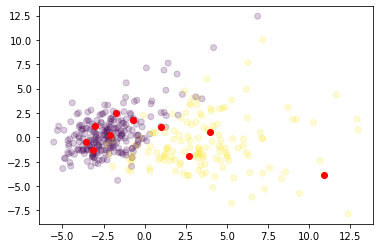

In [ ]:
plt.scatter(training_values_transformed[:,0], training_values_transformed[:,1], c=(training_labels.values)[:,0], alpha=0.2)
plt.scatter(training_values_transformed[idx_mistakes, 0], training_values_transformed[idx_mistakes,1], c='r')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
      
scores = cross_val_score(svm_model, training_values_transformed, training_labels,
scoring="accuracy", cv=10)

# Display scores
def display_scores(scores):
  print(f"Scores:")
  for score in scores:
    print(f"\t{score:.2}")
  print(f"Mean: {scores.mean():.2}")
  print(f"Standard Deviation: {scores.std():.2}")

display_scores(scores)

Scores:
	0.95
	0.95
	0.95
	0.97
	0.9
	0.93
	0.93
	0.9
	0.95
	0.87
Mean: 0.93
Standard Deviation: 0.03


## Evaluation

In [ ]:
print(55 * "=")
print("Support Vector Machines")
print(55 * "-")
print(metrics.classification_report(testing_labels, svm_predictions, target_names=['Benign', 'Malignant']))

Support Vector Machines
-------------------------------------------------------
              precision    recall  f1-score   support

      Benign       0.92      0.99      0.95       107
   Malignant       0.98      0.86      0.92        64

    accuracy                           0.94       171
   macro avg       0.95      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



In [ ]:
# Print confusion matrix
print(55 * "=")
print("Support Vector Machine")
print(55 * "-")
svm_matrix = metrics.confusion_matrix(testing_labels, svm_predictions)

print("True Positive: {}".format(svm_matrix[1][1]))
print("True Negative: {}".format(svm_matrix[0][0]))
print("False Positive: {}".format(svm_matrix[1][0]))
print("False Negative: {}".format(svm_matrix[0][1]))

Support Vector Machine
-------------------------------------------------------
True Positive: 55
True Negative: 106
False Positive: 9
False Negative: 1


In [ ]:
svm_matrix

array([[106,   1],
       [  9,  55]])

# Data Visualization

In [ ]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

In [ ]:
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [ ]:
X0, X1 = training_values_transformed[:, 0], training_values_transformed[:, 1]
xx, yy = make_meshgrid(X0, X1)

In [ ]:
np.c_[xx.ravel(), yy.ravel()]

array([[-6.52911274, -8.86149281],
       [-6.50911274, -8.86149281],
       [-6.48911274, -8.86149281],
       ...,
       [13.95088726, 13.41850719],
       [13.97088726, 13.41850719],
       [13.99088726, 13.41850719]])

In [ ]:
svm_model = SVC()
svm_model.fit(training_values_transformed, training_labels)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

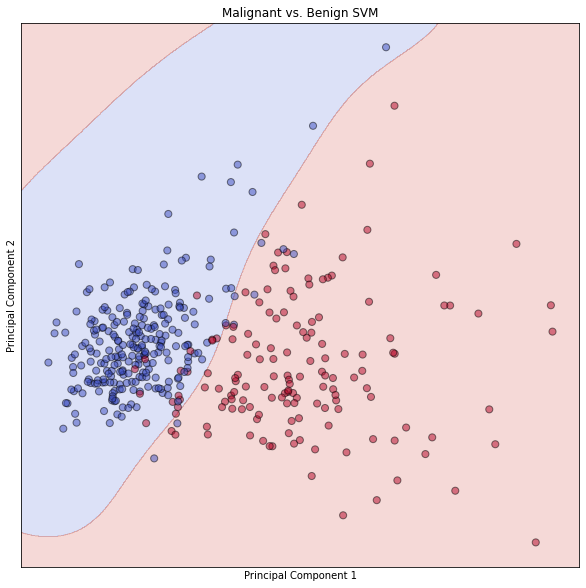

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
plot_contours(ax, svm_model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.2)
ax.scatter(X0, X1, c=training_labels['diagnosis_label'], cmap=plt.cm.coolwarm, alpha=0.5, s=50, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('Malignant vs. Benign SVM')
plt.show()

In [ ]:
training_idx = ((training_labels==0).values)[:,0]

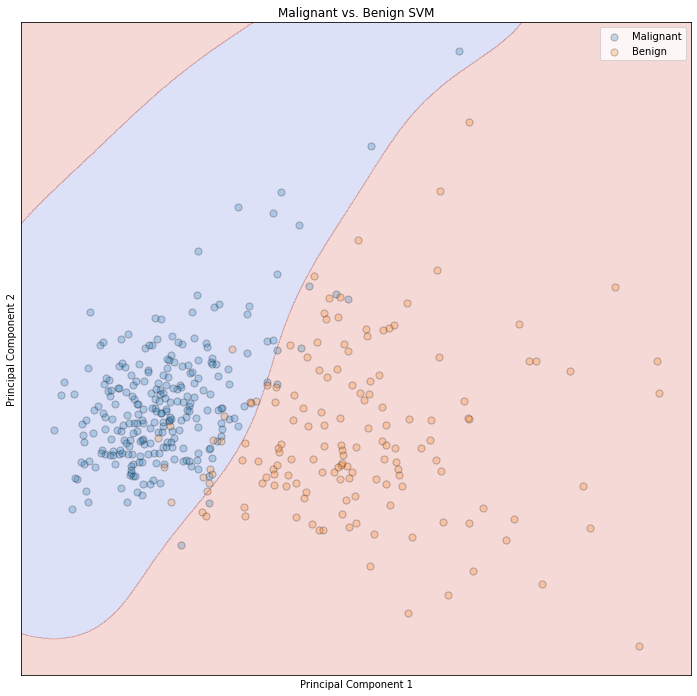

In [ ]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)

plot_contours(ax, svm_model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.2)
training_points_malig = ax.scatter(X0[training_idx], X1[training_idx], cmap=plt.cm.coolwarm, alpha=0.25, s=50, edgecolors='k')
training_points_benign = ax.scatter(X0[~training_idx], X1[~training_idx], cmap=plt.cm.coolwarm, alpha=0.25, s=50, edgecolors='k')
#testing_points = ax.scatter(testing_values_transformed[:,0], testing_values_transformed[:,1], c='k', alpha=0.75, s=50, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('Malignant vs. Benign SVM')
#ax.legend((training_points_malig, training_points_benign, testing_points), ('Malignant', 'Benign', 'Testing'))
ax.legend((training_points_malig, training_points_benign), ('Malignant', 'Benign'))
plt.show()

In [ ]:
training_points_benign = ax.scatter(X0[training_idx], X1[training_idx], cmap=plt.cm.coolwarm, alpha=0.5, s=50, edgecolors='k')
training_points_malignant = ax.scatter(X0[~training_idx], X1[~training_idx], cmap=plt.cm.coolwarm, alpha=0.5, s=50, edgecolors='k')